#  Tensors

In [1]:
import torch
import numpy as np

In [5]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [8]:
np_array = np.array(data)
np_array
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [7]:
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [10]:
x_rand =torch.rand_like(x_data, dtype = torch.float)
x_rand

tensor([[0.3138, 0.7564],
        [0.4633, 0.4337]])

## Initialize with shape

In [18]:
shape = (200,300)
x_data = torch.zeros(shape)
rand_tensor = torch.rand_like(x_data, dtype = torch.float)
print(f'{rand_tensor.max()},{rand_tensor.min()}')

0.9999905824661255,5.066394805908203e-06


In [20]:
rand_tensor.shape

torch.Size([200, 300])

In [21]:
rand_tensor.device

device(type='cpu')

In [22]:
if torch.cuda.is_available():
    rand_tensor = rand_tensor.to('cuda')
    print(rand_tensor.device)

cuda:0


In [23]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [24]:
t1 = torch.cat([tensor]*3, dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [25]:
tensor.matmul(tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [26]:
tensor@tensor.T

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [27]:
# Tensor  to numpy

In [30]:
t = torch.ones(5)
n = t.numpy()

In [31]:
#both th tensor and linked numpy are modified
t.add_(1)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


# Autograd 

In [5]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights= ResNet18_Weights.DEFAULT)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)
labels

tensor([[8.2995e-01, 3.5181e-01, 9.7174e-01, 9.9821e-01, 2.5575e-01, 7.8434e-02,
         5.1858e-01, 8.0455e-02, 5.9222e-01, 5.3671e-02, 2.1143e-01, 7.1880e-01,
         6.4225e-01, 8.0243e-01, 6.7352e-01, 2.8500e-01, 4.9095e-01, 8.7154e-01,
         9.6628e-01, 7.9509e-01, 5.2443e-01, 2.8295e-01, 9.3524e-01, 1.5380e-01,
         9.3099e-02, 8.7665e-01, 1.9489e-01, 8.4224e-01, 4.5808e-01, 9.8960e-01,
         2.4473e-01, 1.6215e-02, 9.0173e-01, 1.3534e-01, 5.9654e-01, 3.7612e-01,
         5.6757e-02, 7.4518e-01, 9.8943e-01, 1.1474e-01, 8.2057e-01, 5.6941e-01,
         1.2998e-01, 8.1630e-01, 6.7228e-01, 7.9711e-01, 8.6957e-01, 2.2672e-01,
         6.9113e-01, 9.5550e-01, 3.3796e-01, 3.1000e-01, 8.1582e-01, 6.2931e-02,
         3.3047e-01, 5.0335e-01, 6.8433e-01, 5.3067e-01, 2.0935e-01, 2.8507e-01,
         6.8924e-01, 3.8451e-01, 5.3279e-01, 7.7114e-01, 4.0460e-02, 2.9730e-02,
         6.7358e-01, 8.3931e-01, 2.2413e-01, 3.7409e-01, 6.0166e-02, 2.3164e-01,
         4.3304e-01, 2.2330e

In [7]:
prediction = model(data)
loss = (prediction - labels).sum()
loss.backward()
optim = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)
optim.step()

### Diffferentiation in autograd

In [21]:
a = torch.tensor([2.0,3.0], requires_grad=True)
b= torch.tensor([6.0,4.0],requires_grad=True)
q = 3*a**3 - b**2
q.backward(gradient = torch.tensor([1.0,1.0]))

In [22]:
a.grad

tensor([36., 81.])

In [23]:
b.grad

tensor([-12.,  -8.])

In [24]:
from torch import nn, optim
model = resnet18(weights=ResNet18_Weights.DEFAULT)
for param in model.parameters():
        param.requires_grad = False


In [26]:
model.fc = nn.Linear(512,80)
optimizer = optim.SGD(model.parameters(), lr = 1e-2, momentum= 0.9)

In [31]:
### Neural Nets

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [44]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2,2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, (2,2))
        s4 = torch.flatten(s4,1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        f7 = self.fc3(f6)
        return f7
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Load data



In [58]:
import torchvision
import torchvision.transforms as transforms

In [56]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5, 0.5))])
batch_size = 4

In [68]:
trainset = torchvision.datasets.CIFAR10(root = './data',train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root ='./data', train = False, download=True,transform =False )
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, num_workers = 2)
clases = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


ship  car  frog  cat 


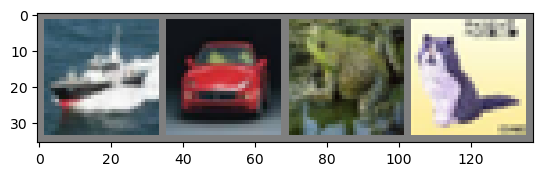

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{clases[labels[j]]} ' for j in range(batch_size)))


In [74]:
# Define new network
import torch.nn as nn
import torch.nn.functional as F

net = nn.Sequential(
    [nn.Conv2d(3,5,5),
     nn.ReLU(),
     nn.MaxPool2d(2,2),
     nn.Conv2d(6,16,5),
     nn.ReLU(),
     nn.MaxPool2d(2,2),
     nn.

     nn.Linear(16*5*5, 120),
     nn.Linear(120,84),
     nn.Linear(84,10)

    ])


